In [54]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import math
from scipy.signal import savgol_filter

from CCDPApy.helper import output_path

pd.set_option('display.max_columns', 200)

In [71]:
# loading data
path = output_path('Genentech_output_seed_scale.xlsx')
df = pd.read_excel(path)
# fill NAN with np.nan
df = df.fillna(np.nan)
df.head(3)

,Experiment Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Concentration Before Feeding,Unnamed: 47,Concentration After Feeding,Unnamed: 49,Cumulative Consumption/Production,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,SP. Rate Two-Point Calculation,Unnamed: 56,Unnamed: 57,Unnamed: 58,SP. Rate Polynomial Regression,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,Date (MM/DD/YY H:MM:SS AM/PM),Cell Line,ID,Name,Initial Volume (mL),Sample Volume (mL),Volume Before Sampling (mL),Volume After Sampling (mL),Feed Media Added (mL),Base Added (mL),Osmolarity,Viable Cell Concentration (10^6 cells/mL),Dead Cell Concentration (10^6 cells/mL),Total Cell Concentration (10^6 cells/mL),IgG (mg/L),NH4+,Na+,Titer,PCV,pCO2,pHoff,pO2,air sparge,air sparge sp,air sparge total,co2 sparge,co2 sparge total,do2 controller output,do2 primary,do2 secondary,flowrate overlay,oxygen sparge,oxygen sparge total,ph controller output,ph primary,pressure exhaust valve,sparge total,temperature,temperature jacket,weight load cell,Titer_range,Titer_group,Viability (%),Titer_category,Run Time (day),Run Time (hr),Glucose (mM),Lactate (mM),Glucose (mM),Lactate (mM),Cell (10^6 cells),IVCC (10^6 cells hr/mL),IgG (mg),Glucose (mmol),Lactate (mmol),Cell (hr^-1),IgG (mg/10^9 cells/hr),Glucose (mmol/10^9 cells/hr),Lactate (mmol/10^9 cells/hr),Cell (hr^-1),IgG (mg/10^9 cells/hr),Glucose (mmol/10^9 cells/hr),Lactate (mmol/10^9 cells/hr)
1,2022-01-01 00:00:00,80L,294592,Genentech,80000,0,65190.53925,65190.53925,0,0,283.748784,0.415612,0.011999,0.427611,0,1.492941,91.042395,1.059949,0.066466,42.233436,7.175178,146.195805,0.009823,0,125.059288,0.024126,25.129515,0,91.364229,90.216909,5.002909,0.004518,0,47.548051,7.228373,36.24014,0.013406,36.92489,37.418953,0,1.05-1.10,Middle 60%,97.194035,0,0,0,39.870958,3.868316,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,-1.143551,0.593985
2,2022-01-01 10:00:00,80L,294592,Genentech,80000,0,73579.87564,73579.87564,0,26.686667,279.139309,0.404801,0.012001,0.416802,0,1.939347,90.640228,1.059949,0.089396,35.275943,7.199856,130.109116,0.558427,11.044321,115.033526,0.025852,0,11.046163,21.504282,41.253998,5.001564,0.003446,2.951405,47.439485,7.229691,36.224659,0.558755,37.057936,37.374289,0,1.05-1.10,Middle 60%,97.120687,0,0,10,38.752525,6.09406,38.752525,6.09406,2691.250847,4.102066,0,-252.196677,196.222586,0.009463,0,-0.88678,0.689963,-0.005622,0,-0.245786,0.683773


In [72]:
df.tail(12)

,Experiment Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Concentration Before Feeding,Unnamed: 47,Concentration After Feeding,Unnamed: 49,Cumulative Consumption/Production,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,SP. Rate Two-Point Calculation,Unnamed: 56,Unnamed: 57,Unnamed: 58,SP. Rate Polynomial Regression,Unnamed: 60,Unnamed: 61,Unnamed: 62
5092,2024-01-01 20:00:00,2000L,843771,Genentech,2000000,0,2000000,2000000,0,0,314.003592,0.292808,0.066165,0.358972,0,2.119917,90.580286,1.034423,0.134762,33.478021,7.211048,112.973772,8.998459,17.96537,7598.048433,0.139012,180.415903,8.982998,29.753693,29.688091,75.370481,0,0,48.505177,7.175619,33.975998,9.028486,37.045092,36.792588,2506.098569,1.00-1.05,Middle 60%,81.568333,0,0,20,39.345864,8.978952,39.345864,8.978952,386317.898,3.924561,0,4461.415873,12085.478863,0.039498,0,0.456144,1.235644,0.039797,0,0.459085,1.03448
5093,2024-01-02 06:00:00,2000L,843771,Genentech,2000000,0,2000000,2000000,0,64.194718,333.336499,0.393181,0.05222,0.445401,0,2.516047,91.951436,1.034423,0.166701,30.570652,7.181739,101.312377,13.03085,26.033142,14128.01429,0.039236,190.315781,13.014599,29.919709,29.740512,75.365915,0,0,50.039897,7.122289,35.616673,12.965238,36.996212,36.802921,2505.287017,1.00-1.05,Middle 60%,88.275832,0,1,30,38.101928,12.000321,38.101928,12.000321,587065.198,7.354504,0,6949.286962,18128.218295,0.029264,0,0.362669,0.88088,0.031144,0,0.431111,0.769826
5094,2024-01-02 16:00:00,2000L,843771,Genentech,2000000,0,2000000,2000000,0,1267.667289,309.238473,0.528798,0.167695,0.696493,0,3.076692,91.539197,1.034423,0.228261,26.077248,7.162001,96.324287,19.007069,37.853202,23658.55508,0.039778,190.315781,18.940317,29.805114,29.634271,75.36876,0,0,50.201683,7.121268,37.595385,18.860498,36.970083,36.827962,2500.183928,1.00-1.05,Middle 60%,75.922891,0,1,40,35.840514,15.021691,35.840514,15.021691,858298.06,11.964398,0,11472.1151,24170.957726,0.029419,0,0.490557,0.65541,0.026688,0,0.399405,0.57001
5095,2024-01-03 02:00:00,2000L,843771,Genentech,2000000,0,2000000,2000000,0,4541.659179,285.140447,0.664414,0.380756,1.04517,0,3.637337,91.126958,1.034423,0.28982,21.583844,7.142262,91.336196,18.913058,37.738214,35290.6975,0.039308,190.315781,24.490227,28.980742,28.976864,75.366646,1.104063,247.208262,54.628581,7.1188,38.243118,19.970268,37.023844,36.704019,2499.262986,1.00-1.05,Middle 60%,63.569951,0,2,50,33.5791,18.043061,33.5791,18.043061,1129530.924,17.930456,0,15994.943238,30213.697136,0.022731,0,0.379047,0.506426,0.024461,0,0.390603,0.450202
5096,2024-01-03 12:00:00,2000L,843771,Genentech,2000000,0,2000000,2000000,0,10647.58268,281.783558,0.844008,0.37961,1.223618,0,4.069231,94.24039,1.034423,0.347185,22.144234,7.126378,89.505422,17.513087,34.951272,46235.53352,0.039537,190.315781,30.111356,29.845559,29.814604,75.366563,2.536564,1307.944674,55.535569,7.118018,38.72039,20.0381,36.996752,36.707078,2508.242422,1.00-1.05,Middle 60%,68.97641,0,2,60,30.792006,21.002121,30.792006,21.002121,1488718.328,25.472565,0,21569.131619,36131.817584,0.023812,0,0.369538,0.392339,0.023274,0,0.372577,0.35045
5097,2024-01-01 00:00:00,2000L,844562,Genentech,2000000,0,2000000,2000000,0,0,284.40233,0.104588,0.016937,0.121525,0,1.556895,92.713834,0.991717,0.058945,45.173179,7.179481,145.116796,1.828717,3.547041,1362.924553,0.035443,223.054551,1.777188,22.204096,22.101164,75.350803,0,0,49.992974,7.154022,38.685469,1.746537,36.99482,37.38173,2279.873569,0.95-1.00,Middle 60%,86.063149,0,0,0,41.389142,6.234897,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,N

In [73]:
# Rename
rename_cols = ['Concentration After Feeding', 'Unnamed: 49', 'SP. Rate Polynomial Regression', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62']
new_names = ['Glucose_after_feed (mM)', 'Lactate_after_feed (mM)', 'qCell_poly (hr^-1)', 'qIgG_poly (mg/10^9 cells/hr)', 'qGlucose_poly (mmol/10^9 cells/hr)', 'qLactate_poly (mmol/10^9 cells/hr)']
df.loc[0, rename_cols] = new_names
df.head(3)

,Experiment Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Concentration Before Feeding,Unnamed: 47,Concentration After Feeding,Unnamed: 49,Cumulative Consumption/Production,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,SP. Rate Two-Point Calculation,Unnamed: 56,Unnamed: 57,Unnamed: 58,SP. Rate Polynomial Regression,Unnamed: 60,Unnamed: 61,Unnamed: 62
0,Date (MM/DD/YY H:MM:SS AM/PM),Cell Line,ID,Name,Initial Volume (mL),Sample Volume (mL),Volume Before Sampling (mL),Volume After Sampling (mL),Feed Media Added (mL),Base Added (mL),Osmolarity,Viable Cell Concentration (10^6 cells/mL),Dead Cell Concentration (10^6 cells/mL),Total Cell Concentration (10^6 cells/mL),IgG (mg/L),NH4+,Na+,Titer,PCV,pCO2,pHoff,pO2,air sparge,air sparge sp,air sparge total,co2 sparge,co2 sparge total,do2 controller output,do2 primary,do2 secondary,flowrate overlay,oxygen sparge,oxygen sparge total,ph controller output,ph primary,pressure exhaust valve,sparge total,temperature,temperature jacket,weight load cell,Titer_range,Titer_group,Viability (%),Titer_category,Run Time (day),Run Time (hr),Glucose (mM),Lactate (mM),Glucose_after_feed (mM),Lactate_after_feed (mM),Cell (10^6 cells),IVCC (10^6 cells hr/mL),IgG (mg),Glucose (mmol),Lactate (mmol),Cell (hr^-1),IgG (mg/10^9 cells/hr),Glucose (mmol/10^9 cells/hr),Lactate (mmol/10^9 cells/hr),qCell_poly (hr^-1),qIgG_poly (mg/10^9 cells/hr),qGlucose_poly (mmol/10^9 cells/hr),qLactate_poly (mmol/10^9 cells/hr)
1,2022-01-01 00:00:00,80L,294592,Genentech,80000,0,65190.53925,65190.53925,0,0,283.748784,0.415612,0.011999,0.427611,0,1.492941,91.042395,1.059949,0.066466,42.233436,7.175178,146.195805,0.009823,0,125.059288,0.024126,25.129515,0,91.364229,90.216909,5.002909,0.004518,0,47.548051,7.228373,36.24014,0.013406,36.92489,37.418953,0,1.05-1.10,Middle 60%,97.194035,0,0,0,39.870958,3.868316,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,-1.143551,0.593985
2,2022-01-01 10:00:00,80L,294592,Genentech,80000,0,73579.87564,73579.87564,0,26.686667,279.139309,0.404801,0.012001,0.416802,0,1.939347,90.640228,1.059949,0.089396,35.275943,7.199856,130.109116,0.558427,11.044321,115.033526,0.025852,0,11.046163,21.504282,41.253998,5.001564,0.003446,2.951405,47.439485,7.229691,36.224659,0.558755,37.057936,37.374289,0,1.05-1.10,Middle 60%,97.120687,0,0,10,38.752525,6.09406,38.752525,6.09406,2691.250847,4.102066,0,-252.196677,196.222586,0.009463,0,-0.88678,0.689963,-0.005622,0,-0.245786,0.683773


In [74]:
# Get the first row and set it as column names
df.columns = df.iloc[0]
# Drop the first row after setting it as column names
df = df[1:]
df = df.reset_index(drop=True)
df.head(3)

,Date (MM/DD/YY H:MM:SS AM/PM),Cell Line,ID,Name,Initial Volume (mL),Sample Volume (mL),Volume Before Sampling (mL),Volume After Sampling (mL),Feed Media Added (mL),Base Added (mL),Osmolarity,Viable Cell Concentration (10^6 cells/mL),Dead Cell Concentration (10^6 cells/mL),Total Cell Concentration (10^6 cells/mL),IgG (mg/L),NH4+,Na+,Titer,PCV,pCO2,pHoff,pO2,air sparge,air sparge sp,air sparge total,co2 sparge,co2 sparge total,do2 controller output,do2 primary,do2 secondary,flowrate overlay,oxygen sparge,oxygen sparge total,ph controller output,ph primary,pressure exhaust valve,sparge total,temperature,temperature jacket,weight load cell,Titer_range,Titer_group,Viability (%),Titer_category,Run Time (day),Run Time (hr),Glucose (mM),Lactate (mM),Glucose_after_feed (mM),Lactate_after_feed (mM),Cell (10^6 cells),IVCC (10^6 cells hr/mL),IgG (mg),Glucose (mmol),Lactate (mmol),Cell (hr^-1),IgG (mg/10^9 cells/hr),Glucose (mmol/10^9 cells/hr),Lactate (mmol/10^9 cells/hr),qCell_poly (hr^-1),qIgG_poly (mg/10^9 cells/hr),qGlucose_poly (mmol/10^9 cells/hr),qLactate_poly (mmol/10^9 cells/hr)
0,2022-01-01 00:00:00,80L,294592,Genentech,80000,0,65190.53925,65190.53925,0,0,283.748784,0.415612,0.011999,0.427611,0,1.492941,91.042395,1.059949,0.066466,42.233436,7.175178,146.195805,0.009823,0,125.059288,0.024126,25.129515,0,91.364229,90.216909,5.002909,0.004518,0,47.548051,7.228373,36.24014,0.013406,36.92489,37.418953,0,1.05-1.10,Middle 60%,97.194035,0,0,0,39.870958,3.868316,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,-1.143551,0.593985
1,2022-01-01 10:00:00,80L,294592,Genentech,80000,0,73579.87564,73579.87564,0,26.686667,279.139309,0.404801,0.012001,0.416802,0,1.939347,90.640228,1.059949,0.089396,35.275943,7.199856,130.109116,0.558427,11.044321,115.033526,0.025852,0,11.046163,21.504282,41.253998,5.001564,0.003446,2.951405,47.439485,7.229691,36.224659,0.558755,37.057936,37.374289,0,1.05-1.10,Middle 60%,97.120687,0,0,10,38.752525,6.09406,38.752525,6.09406,2691.250847,4.102066,0,-252.196677,196.222586,0.009463,0,-0.88678,0.689963,-0.005622,0,-0.245786,0.683773
2,2022-01-01 20:00:00,80L,294592,Genentech,80000,0,73244.03496,73244.03496,0,26.686667,279.286866,0.469224,0.018471,0.487695,0,2.385753,90.238061,1.059949,0.123071,28.31845,7.208973,114.022426,0.85758,17.275335,531.097068,0.022457,0,17.289231,29.619363,42.900746,5.002751,0.00746,6.09249,47.784864,7.230197,36.524988,0.856754,36.962682,37.381836,0,1.05-1.10,Middle 60%,96.212574,0,0,20,37.851113,8.859019,37.851113,8.859019,7273.880481,8.472192,0,-173.158984,396.69271,0.014287,0,0.246403,0.624974,0.027589,0,0.269318,0.68359


In [75]:
# Rename Columns
df = df.rename(columns={
    'Base Added (mL)': 'base',
    'Osmolarity': 'osmo',
    'Viable Cell Concentration (10^6 cells/mL)': 'vcd',
    'Dead Cell Concentration (10^6 cells/mL)': 'dcd',
    'Total Cell Concentration (10^6 cells/mL)': 'tcd',
    'Viability (%)': 'viab',
    'Glucose (mM)': 'glc',
    'Lactate (mM)': 'lac',
    'Glucose_after_feed (mM)': 'glc_after',
    'Lactate_after_feed (mM)': 'lac_after',
    'Cell (10^6 cells)': 'ccell',
    'IVCC (10^6 cells hr/mL)': 'ivcc',
    'Glucose (mmol)': 'cglc',
    'Lactate (mmol)': 'clac',
    'Cell (hr^-1)': 'mu',
    'Glucose (mmol/10^9 cells/hr)': 'qglc',
    'Lactate (mmol/10^9 cells/hr)': 'qlac',
    'qCell_poly (hr^-1)': 'mu_poly', 
    'qGlucose_poly (mmol/10^9 cells/hr)': 'qglc_poly',
    'qLactate_poly (mmol/10^9 cells/hr)': 'qlac_poly',
})
df.head(3)

,Date (MM/DD/YY H:MM:SS AM/PM),Cell Line,ID,Name,Initial Volume (mL),Sample Volume (mL),Volume Before Sampling (mL),Volume After Sampling (mL),Feed Media Added (mL),base,osmo,vcd,dcd,tcd,IgG (mg/L),NH4+,Na+,Titer,PCV,pCO2,pHoff,pO2,air sparge,air sparge sp,air sparge total,co2 sparge,co2 sparge total,do2 controller output,do2 primary,do2 secondary,flowrate overlay,oxygen sparge,oxygen sparge total,ph controller output,ph primary,pressure exhaust valve,sparge total,temperature,temperature jacket,weight load cell,Titer_range,Titer_group,viab,Titer_category,Run Time (day),Run Time (hr),glc,lac,glc_after,lac_after,ccell,ivcc,IgG (mg),cglc,clac,mu,IgG (mg/10^9 cells/hr),qglc,qlac,mu_poly,qIgG_poly (mg/10^9 cells/hr),qglc_poly,qlac_poly
0,2022-01-01 00:00:00,80L,294592,Genentech,80000,0,65190.53925,65190.53925,0,0,283.748784,0.415612,0.011999,0.427611,0,1.492941,91.042395,1.059949,0.066466,42.233436,7.175178,146.195805,0.009823,0,125.059288,0.024126,25.129515,0,91.364229,90.216909,5.002909,0.004518,0,47.548051,7.228373,36.24014,0.013406,36.92489,37.418953,0,1.05-1.10,Middle 60%,97.194035,0,0,0,39.870958,3.868316,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,-1.143551,0.593985
1,2022-01-01 10:00:00,80L,294592,Genentech,80000,0,73579.87564,73579.87564,0,26.686667,279.139309,0.404801,0.012001,0.416802,0,1.939347,90.640228,1.059949,0.089396,35.275943,7.199856,130.109116,0.558427,11.044321,115.033526,0.025852,0,11.046163,21.504282,41.253998,5.001564,0.003446,2.951405,47.439485,7.229691,36.224659,0.558755,37.057936,37.374289,0,1.05-1.10,Middle 60%,97.120687,0,0,10,38.752525,6.09406,38.752525,6.09406,2691.250847,4.102066,0,-252.196677,196.222586,0.009463,0,-0.88678,0.689963,-0.005622,0,-0.245786,0.683773
2,2022-01-01 20:00:00,80L,294592,Genentech,80000,0,73244.03496,73244.03496,0,26.686667,279.286866,0.469224,0.018471,0.487695,0,2.385753,90.238061,1.059949,0.123071,28.31845,7.208973,114.022426,0.85758,17.275335,531.097068,0.022457,0,17.289231,29.619363,42.900746,5.002751,0.00746,6.09249,47.784864,7.230197,36.524988,0.856754,36.962682,37.381836,0,1.05-1.10,Middle 60%,96.212574,0,0,20,37.851113,8.859019,37.851113,8.859019,7273.880481,8.472192,0,-173.158984,396.69271,0.014287,0,0.246403,0.624974,0.027589,0,0.269318,0.68359


In [82]:
# Parameters to smooth
params_smooth = {'mu': 4}

df_list = []

for cl_name, df_cellline in df.groupby(by='Cell Line'):
    print(cl_name)
    for id, group_df in df_cellline.groupby(by='ID'):
        x = group_df['Run Time (hr)'].unique().astype(float)
        y = group_df['mu'].to_numpy().astype(float)
        coefficients = np.polyfit(x[1:], y[1:], deg=4)
        poly_function = np.poly1d(coefficients)
        y_smooth = poly_function(x)
            
        temp = pd.DataFrame(data={'mu_s': y_smooth})
        df_list.append(temp)

df_smoothed = pd.concat(df_list, axis=0).reset_index(drop=True)
df_smoothed.head()

2000L
400L
80L


,mu_s
0,-0.140583
1,0.008572
2,0.027244
3,0.018149
4,0.022042


In [83]:
# Combine
df_smoothed = pd.concat([df, df_smoothed], axis=1)
df_smoothed.head()

,Date (MM/DD/YY H:MM:SS AM/PM),Cell Line,ID,Name,Initial Volume (mL),Sample Volume (mL),Volume Before Sampling (mL),Volume After Sampling (mL),Feed Media Added (mL),base,osmo,vcd,dcd,tcd,IgG (mg/L),NH4+,Na+,Titer,PCV,pCO2,pHoff,pO2,air sparge,air sparge sp,air sparge total,co2 sparge,co2 sparge total,do2 controller output,do2 primary,do2 secondary,flowrate overlay,oxygen sparge,oxygen sparge total,ph controller output,ph primary,pressure exhaust valve,sparge total,temperature,temperature jacket,weight load cell,Titer_range,Titer_group,viab,Titer_category,Run Time (day),Run Time (hr),glc,lac,glc_after,lac_after,ccell,ivcc,IgG (mg),cglc,clac,mu,IgG (mg/10^9 cells/hr),qglc,qlac,mu_poly,qIgG_poly (mg/10^9 cells/hr),qglc_poly,qlac_poly,mu_s
0,2022-01-01 00:00:00,80L,294592,Genentech,80000,0,65190.53925,65190.53925,0,0,283.748784,0.415612,0.011999,0.427611,0,1.492941,91.042395,1.059949,0.066466,42.233436,7.175178,146.195805,0.009823,0,125.059288,0.024126,25.129515,0,91.364229,90.216909,5.002909,0.004518,0,47.548051,7.228373,36.24014,0.013406,36.92489,37.418953,0,1.05-1.10,Middle 60%,97.194035,0,0,0,39.870958,3.868316,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,-1.143551,0.593985,-0.140583
1,2022-01-01 10:00:00,80L,294592,Genentech,80000,0,73579.87564,73579.87564,0,26.686667,279.139309,0.404801,0.012001,0.416802,0,1.939347,90.640228,1.059949,0.089396,35.275943,7.199856,130.109116,0.558427,11.044321,115.033526,0.025852,0,11.046163,21.504282,41.253998,5.001564,0.003446,2.951405,47.439485,7.229691,36.224659,0.558755,37.057936,37.374289,0,1.05-1.10,Middle 60%,97.120687,0,0,10,38.752525,6.09406,38.752525,6.09406,2691.250847,4.102066,0,-252.196677,196.222586,0.009463,0,-0.88678,0.689963,-0.005622,0,-0.245786,0.683773,0.008572
2,2022-01-01 20:00:00,80L,294592,Genentech,80000,0,73244.03496,73244.03496,0,26.686667,279.286866,0.469224,0.018471,0.487695,0,2.385753,90.238061,1.059949,0.123071,28.31845,7.208973,114.022426,0.85758,17.275335,531.097068,0.022457,0,17.289231,29.619363,42.900746,5.002751,0.00746,6.09249,47.784864,7.230197,36.524988,0.856754,36.962682,37.381836,0,1.05-1.10,Middle 60%,96.212574,0,0,20,37.851113,8.859019,37.851113,8.859019,7273.880481,8.472192,0,-173.158984,396.69271,0.014287,0,0.246403,0.624974,0.027589,0,0.269318,0.68359,0.027244
3,2022-01-02 06:00:00,80L,294592,Genentech,80000,0,72807.00722,72807.00722,0,26.686667,280.349446,0.650595,0.030442,0.681036,0,2.845994,90.520338,1.059949,0.166909,22.465542,7.192178,106.997621,0.784443,15.549562,1052.000825,0.004128,0,18.359158,27.817933,36.044298,5.000931,0.061182,12.860067,49.382649,7.227377,35.97661,0.845073,37.006237,37.450892,0,1.05-1.10,Middle 60%,95.530097,0,1,30,36.069321,12.384662,36.069321,12.384662,20273.879437,14.071284,0,-26.890018,649.512579,0.03181,0,0.357907,0.618628,0.034112,0,0.395768,0.537813,0.018149
4,2022-01-02 16:00:00,80L,294592,Genentech,80000,0,72317.21588,72317.21588,0,27.263264,277.421355,0.881518,0.041143,0.922662,0,3.326306,91.795502,1.059949,0.222023,18.214995,7.164092,113.118408,0.926161,18.613675,1573.673546,0,0,21.101975,29.854183,34.690836,5.001971,0.067076,23.158474,50,7.183341,35.788841,0.992384,37.006237,37.426133,0,1.05-1.10,Middle 60%,95.540811,0,1,40,33.27201,16.242056,33.27201,16.242056,36654.982867,21.73185,0,193.070147,922.40268,0.029484,0,0.395908,0.491177,0.024614,0,0.331794,0.412726,0.022042


In [84]:
def make_plot_df(data):
    '''create dataframe for plotting'''
    columns_drop = [
        'Date (MM/DD/YY H:MM:SS AM/PM)', 
        # 'Cell Line', 
        'Name',
        'Initial Volume (mL)', 
        'Sample Volume (mL)', 
        'Volume Before Sampling (mL)', 
        'Volume After Sampling (mL)',
        'Feed Media Added (mL)', 
        #'Feed Status', 
        #'# Feed', 
        'IgG (mg/L)', 
        'IgG (mg)', 
        'IgG (mg/10^9 cells/hr)',
        'qIgG_poly (mg/10^9 cells/hr)'
    ]
    df = data.drop(columns=columns_drop, axis=1)
    id_cols = [
        'Cell Line', 'ID', 'Titer', 'Titer_range', 'Titer_group', 'Titer_category',
        'Run Time (day)', 'Run Time (hr)', 'glc_after', 'lac_after',
    ]
    plot_df = df.melt(id_vars=id_cols, var_name='Parameter', value_name="Value")
    return plot_df

plot_df = make_plot_df(data=df_smoothed)
plot_df.head()

,Cell Line,ID,Titer,Titer_range,Titer_group,Titer_category,Run Time (day),Run Time (hr),glc_after,lac_after,Parameter,Value
0,80L,294592,1.059949,1.05-1.10,Middle 60%,0,0,0,NaN,NaN,base,0
1,80L,294592,1.059949,1.05-1.10,Middle 60%,0,0,10,38.752525,6.09406,base,26.686667
2,80L,294592,1.059949,1.05-1.10,Middle 60%,0,0,20,37.851113,8.859019,base,26.686667
3,80L,294592,1.059949,1.05-1.10,Middle 60%,0,1,30,36.069321,12.384662,base,26.686667
4,80L,294592,1.059949,1.05-1.10,Middle 60%,0,1,40,33.27201,16.242056,base,27.263264


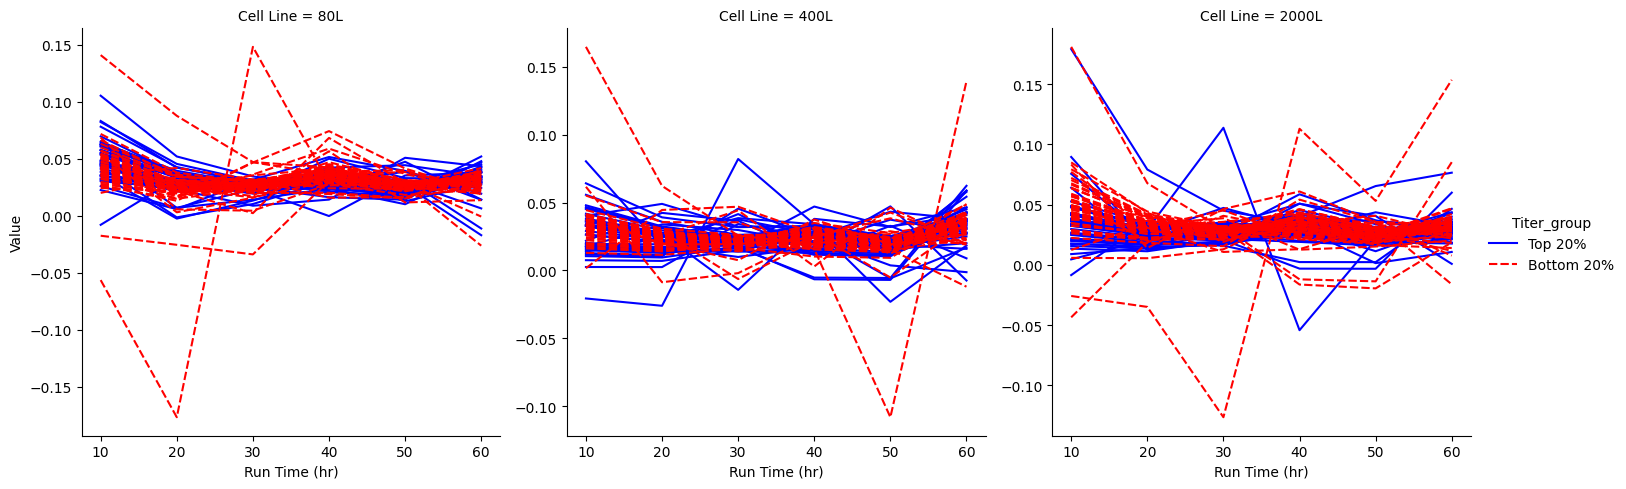

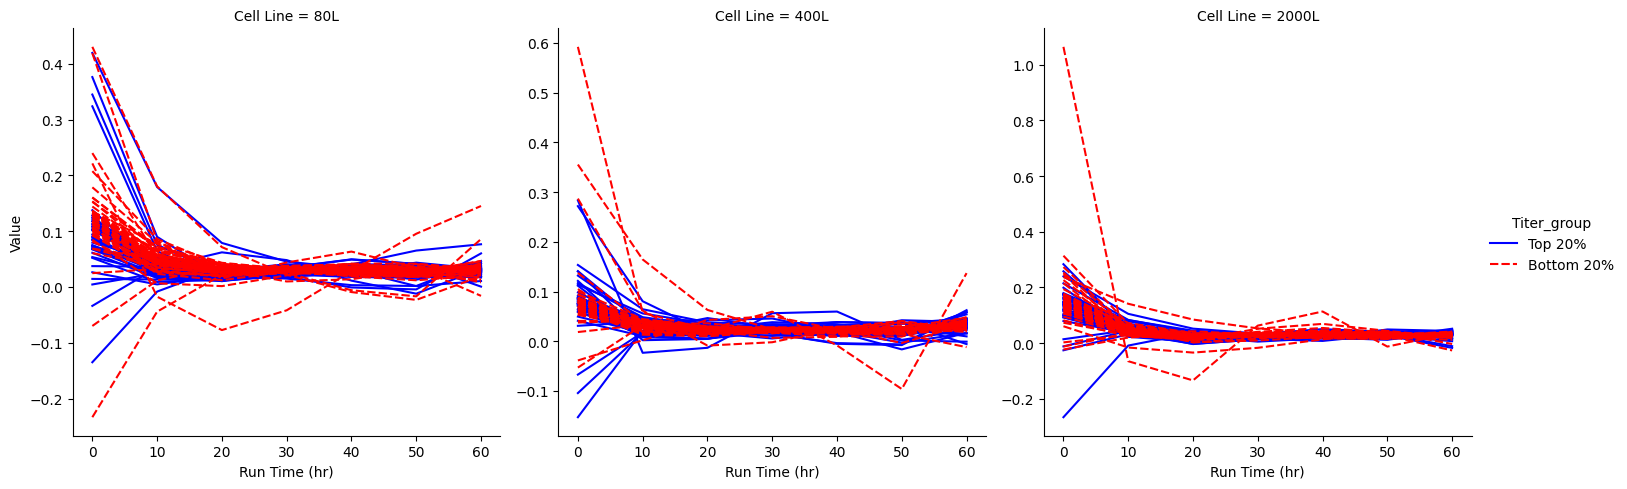

In [87]:
# Plotting Profiles
plot_mask = (plot_df['Parameter']=='mu')
plot_df_raw = plot_df[plot_mask]

plot_mask = (plot_df['Parameter']=='mu_s')
plot_df_smoothed = plot_df[plot_mask]

colors = ["b", "r"]
sns.set_palette(colors)

x = 'Run Time (hr)'
y = 'Value'

sns.relplot(data=plot_df_raw[plot_df_raw['Titer_group']!='Middle 60%'], x=x, y=y, kind='line',
            estimator=None, units='ID',
            hue='Titer_group', hue_order=['Top 20%', 'Bottom 20%'],
            style='Titer_group', style_order=['Top 20%', 'Bottom 20%'],
            # col='Parameter',
            col='Cell Line',
            facet_kws={'sharey': False, 'sharex': True},)

sns.relplot(data=plot_df_smoothed[plot_df_smoothed['Titer_group']!='Middle 60%'], x=x, y=y, kind='line',
            estimator=None, units='ID',
            hue='Titer_group', hue_order=['Top 20%', 'Bottom 20%'],
            style='Titer_group', style_order=['Top 20%', 'Bottom 20%'],
            # col='Parameter',
            col='Cell Line',
            facet_kws={'sharey': False, 'sharex': True},)

plt.show()

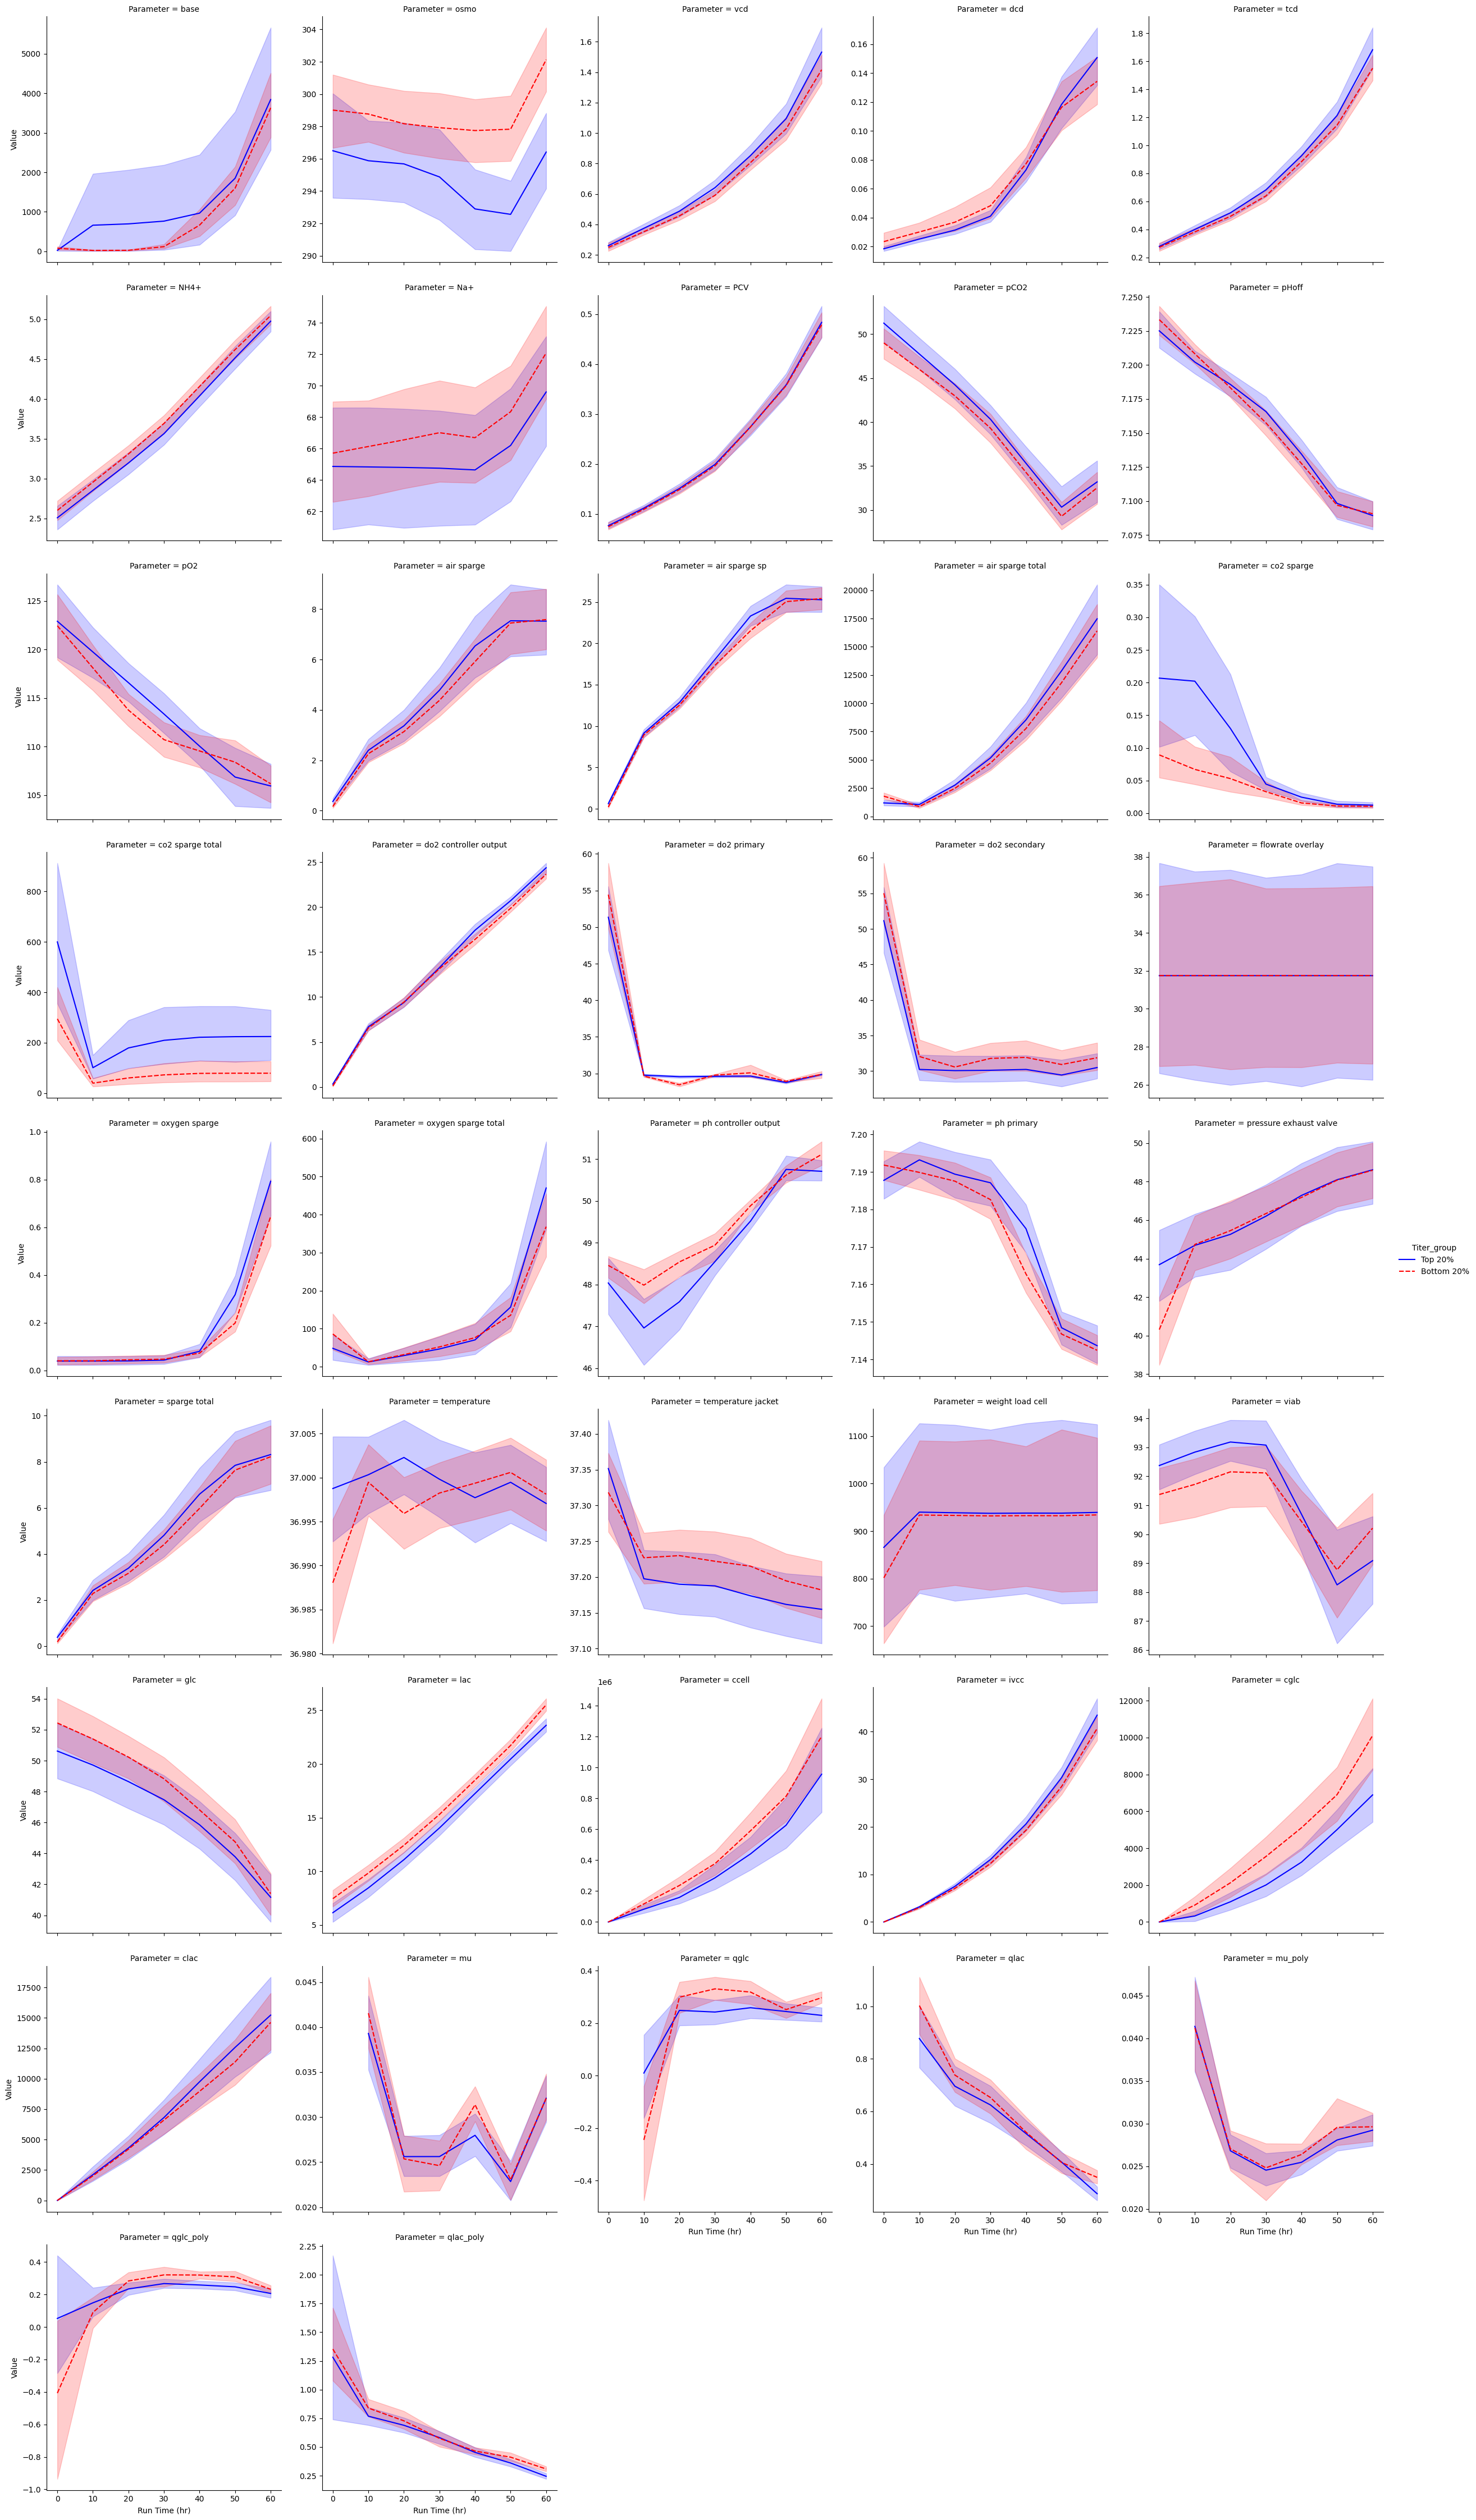

In [88]:
# Plotting Profiles
plot_df = make_plot_df(data=df)
colors = ["b", "r"]
sns.set_palette(colors)
x = 'Run Time (hr)'
y = 'Value'
sns.relplot(data=plot_df[plot_df['Titer_group']!='Middle 60%'], x=x, y=y, kind='line',
            # estimator=None, units='ID',
            hue='Titer_group', hue_order=['Top 20%', 'Bottom 20%'],
            style='Titer_group', style_order=['Top 20%', 'Bottom 20%'],
            col='Parameter',
            col_wrap=5,
            facet_kws={'sharey': False, 'sharex': True},)
plt.show()

In [92]:
df_smoothed.head()

,Date (MM/DD/YY H:MM:SS AM/PM),Cell Line,ID,Name,Initial Volume (mL),Sample Volume (mL),Volume Before Sampling (mL),Volume After Sampling (mL),Feed Media Added (mL),base,osmo,vcd,dcd,tcd,IgG (mg/L),NH4+,Na+,Titer,PCV,pCO2,pHoff,pO2,air sparge,air sparge sp,air sparge total,co2 sparge,co2 sparge total,do2 controller output,do2 primary,do2 secondary,flowrate overlay,oxygen sparge,oxygen sparge total,ph controller output,ph primary,pressure exhaust valve,sparge total,temperature,temperature jacket,weight load cell,Titer_range,Titer_group,viab,Titer_category,Run Time (day),Run Time (hr),glc,lac,glc_after,lac_after,ccell,ivcc,IgG (mg),cglc,clac,mu,IgG (mg/10^9 cells/hr),qglc,qlac,mu_poly,qIgG_poly (mg/10^9 cells/hr),qglc_poly,qlac_poly,mu_s
0,2022-01-01 00:00:00,80L,294592,Genentech,80000,0,65190.53925,65190.53925,0,0,283.748784,0.415612,0.011999,0.427611,0,1.492941,91.042395,1.059949,0.066466,42.233436,7.175178,146.195805,0.009823,0,125.059288,0.024126,25.129515,0,91.364229,90.216909,5.002909,0.004518,0,47.548051,7.228373,36.24014,0.013406,36.92489,37.418953,0,1.05-1.10,Middle 60%,97.194035,0,0,0,39.870958,3.868316,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,-1.143551,0.593985,-0.140583
1,2022-01-01 10:00:00,80L,294592,Genentech,80000,0,73579.87564,73579.87564,0,26.686667,279.139309,0.404801,0.012001,0.416802,0,1.939347,90.640228,1.059949,0.089396,35.275943,7.199856,130.109116,0.558427,11.044321,115.033526,0.025852,0,11.046163,21.504282,41.253998,5.001564,0.003446,2.951405,47.439485,7.229691,36.224659,0.558755,37.057936,37.374289,0,1.05-1.10,Middle 60%,97.120687,0,0,10,38.752525,6.09406,38.752525,6.09406,2691.250847,4.102066,0,-252.196677,196.222586,0.009463,0,-0.88678,0.689963,-0.005622,0,-0.245786,0.683773,0.008572
2,2022-01-01 20:00:00,80L,294592,Genentech,80000,0,73244.03496,73244.03496,0,26.686667,279.286866,0.469224,0.018471,0.487695,0,2.385753,90.238061,1.059949,0.123071,28.31845,7.208973,114.022426,0.85758,17.275335,531.097068,0.022457,0,17.289231,29.619363,42.900746,5.002751,0.00746,6.09249,47.784864,7.230197,36.524988,0.856754,36.962682,37.381836,0,1.05-1.10,Middle 60%,96.212574,0,0,20,37.851113,8.859019,37.851113,8.859019,7273.880481,8.472192,0,-173.158984,396.69271,0.014287,0,0.246403,0.624974,0.027589,0,0.269318,0.68359,0.027244
3,2022-01-02 06:00:00,80L,294592,Genentech,80000,0,72807.00722,72807.00722,0,26.686667,280.349446,0.650595,0.030442,0.681036,0,2.845994,90.520338,1.059949,0.166909,22.465542,7.192178,106.997621,0.784443,15.549562,1052.000825,0.004128,0,18.359158,27.817933,36.044298,5.000931,0.061182,12.860067,49.382649,7.227377,35.97661,0.845073,37.006237,37.450892,0,1.05-1.10,Middle 60%,95.530097,0,1,30,36.069321,12.384662,36.069321,12.384662,20273.879437,14.071284,0,-26.890018,649.512579,0.03181,0,0.357907,0.618628,0.034112,0,0.395768,0.537813,0.018149
4,2022-01-02 16:00:00,80L,294592,Genentech,80000,0,72317.21588,72317.21588,0,27.263264,277.421355,0.881518,0.041143,0.922662,0,3.326306,91.795502,1.059949,0.222023,18.214995,7.164092,113.118408,0.926161,18.613675,1573.673546,0,0,21.101975,29.854183,34.690836,5.001971,0.067076,23.158474,50,7.183341,35.788841,0.992384,37.006237,37.426133,0,1.05-1.10,Middle 60%,95.540811,0,1,40,33.27201,16.242056,33.27201,16.242056,36654.982867,21.73185,0,193.070147,922.40268,0.029484,0,0.395908,0.491177,0.024614,0,0.331794,0.412726,0.022042


In [95]:
df_smoothed.head(12)

,Date (MM/DD/YY H:MM:SS AM/PM),Cell Line,ID,Name,Initial Volume (mL),Sample Volume (mL),Volume Before Sampling (mL),Volume After Sampling (mL),Feed Media Added (mL),base,osmo,vcd,dcd,tcd,IgG (mg/L),NH4+,Na+,Titer,PCV,pCO2,pHoff,pO2,air sparge,air sparge sp,air sparge total,co2 sparge,co2 sparge total,do2 controller output,do2 primary,do2 secondary,flowrate overlay,oxygen sparge,oxygen sparge total,ph controller output,ph primary,pressure exhaust valve,sparge total,temperature,temperature jacket,weight load cell,Titer_range,Titer_group,viab,Titer_category,Run Time (day),Run Time (hr),glc,lac,glc_after,lac_after,ccell,ivcc,IgG (mg),cglc,clac,mu,IgG (mg/10^9 cells/hr),qglc,qlac,mu_poly,qIgG_poly (mg/10^9 cells/hr),qglc_poly,qlac_poly,mu_s
0,2022-01-01 00:00:00,80L,294592,Genentech,80000,0,65190.53925,65190.53925,0,0,283.748784,0.415612,0.011999,0.427611,0,1.492941,91.042395,1.059949,0.066466,42.233436,7.175178,146.195805,0.009823,0,125.059288,0.024126,25.129515,0,91.364229,90.216909,5.002909,0.004518,0,47.548051,7.228373,36.24014,0.013406,36.92489,37.418953,0,1.05-1.10,Middle 60%,97.194035,0,0,0,39.870958,3.868316,NaN,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,-1.143551,0.593985,-0.140583
1,2022-01-01 10:00:00,80L,294592,Genentech,80000,0,73579.87564,73579.87564,0,26.686667,279.139309,0.404801,0.012001,0.416802,0,1.939347,90.640228,1.059949,0.089396,35.275943,7.199856,130.109116,0.558427,11.044321,115.033526,0.025852,0,11.046163,21.504282,41.253998,5.001564,0.003446,2.951405,47.439485,7.229691,36.224659,0.558755,37.057936,37.374289,0,1.05-1.10,Middle 60%,97.120687,0,0,10,38.752525,6.09406,38.752525,6.09406,2691.250847,4.102066,0,-252.196677,196.222586,0.009463,0,-0.88678,0.689963,-0.005622,0,-0.245786,0.683773,0.008572
2,2022-01-01 20:00:00,80L,294592,Genentech,80000,0,73244.03496,73244.03496,0,26.686667,279.286866,0.469224,0.018471,0.487695,0,2.385753,90.238061,1.059949,0.123071,28.31845,7.208973,114.022426,0.85758,17.275335,531.097068,0.022457,0,17.289231,29.619363,42.900746,5.002751,0.00746,6.09249,47.784864,7.230197,36.524988,0.856754,36.962682,37.381836,0,1.05-1.10,Middle 60%,96.212574,0,0,20,37.851113,8.859019,37.851113,8.859019,7273.880481,8.472192,0,-173.158984,396.69271,0.014287,0,0.246403,0.624974,0.027589,0,0.269318,0.68359,0.027244
3,2022-01-02 06:00:00,80L,294592,Genentech,80000,0,72807.00722,72807.00722,0,26.686667,280.349446,0.650595,0.030442,0.681036,0,2.845994,90.520338,1.059949,0.166909,22.465542,7.192178,106.997621,0.784443,15.549562,1052.000825,0.004128,0,18.359158,27.817933,36.044298,5.000931,0.061182,12.860067,49.382649,7.227377,35.97661,0.845073,37.006237,37.450892,0,1.05-1.10,Middle 60%,95.530097,0,1,30,36.069321,12.384662,36.069321,12.384662,20273.879437,14.071284,0,-26.890018,649.512579,0.03181,0,0.357907,0.618628,0.034112,0,0.395768,0.537813,0.018149
4,2022-01-02 16:00:00,80L,294592,Genentech,80000,0,72317.21588,72317.21588,0,27.263264,277.421355,0.881518,0.041143,0.922662,0,3.326306,91.795502,1.059949,0.222023,18.214995,7.164092,113.118408,0.926161,18.613675,1573.673546,0,0,21.101975,29.854183,34.690836,5.001971,0.067076,23.158474,50,7.183341,35.788841,0.992384,37.006237,37.426133,0,1.05-1.10,Middle 60%,95.540811,0,1,40,33.27201,16.242056,33.27201,16.242056,36654.982867,21.73185,0,193.070147,922.40268,0.029484,0,0.395908,0.491177,0.024614,0,0.331794,0.412726,0.022042
5,2022-01-03 02:00:00,80L,294592,Genentech,80000,0,71745.96947,71745.96947,0,93.150458,279.057917,1.015951,0.062891,1.078842,0,3.806674,93.187186,1.059949,0.302025,14.249136,7.157986,118.518611,0.88996,17.765441,2097.74761,0,0,21.785619,30.118317,32.630495,5.002904,0.112281,44.036239,50.05265,7.176175,35.482364,0.995653,37.006237,37.320744,0,1.05-1.10,Middle 60%,94.170528,0,2,50,32.091407,19.803569,32.091407,19.803569,45796.437189,31.219198,0,296.780193,1168.648652,0.01338,0,0.151801,0.360432,0.011786,0,0.225963,0.356712,0.017720
6,2022-01-03 12:00:00,80L,294592,Genentech,80000,0,71316.81259,71316.81259,0,190.915169,281.625678,0.945606,0.029515,0

In [93]:
# Saving
path = output_path('Genentech_seed_scale_smoothed.csv')
df_smoothed.to_csv(path, index=False)